In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [103]:
%store -r df
%store -r df1
%store -r df2
%store -r df2_no_dups
%store -r df3
%store -r df3_no_dups
%store -r df_dur_readytoship_truck
%store -r df_dur_readytoship_truck_standard
%store -r df_dur_readytoship_truck_xpress
%store -r df_no_dups
%store -r df_order_del_time
%store -r df_order_del_time2
%store -r df_order_del_total
%store -r df_prep_dur_ver

In [104]:
df.columns = map(str.lower, df.columns)
df.columns = df.columns.str.replace(' ', '_')
df1.columns = map(str.lower, df1.columns)
df1.columns = df1.columns.str.replace(' ', '_')
df2.columns = map(str.lower, df2.columns)
df2.columns = df2_no_dups.columns.str.replace(' ', '_')
df2_no_dups.columns = map(str.lower, df2.columns)
df2_no_dups.columns = df2_no_dups.columns.str.replace(' ', '_')
df3.columns = map(str.lower, df3.columns)
df3.columns = df3_no_dups.columns.str.replace(' ', '_')
df3_no_dups.columns = map(str.lower, df3_no_dups.columns)
df3_no_dups.columns = df3_no_dups.columns.str.replace(' ', '_')
df_dur_readytoship_truck.columns = map(str.lower, df_dur_readytoship_truck.columns)
df_dur_readytoship_truck.columns = df_dur_readytoship_truck.columns.str.replace(' ', '_')
df_dur_readytoship_truck_standard.columns = map(str.lower, df_dur_readytoship_truck_standard.columns)
df_dur_readytoship_truck_standard.columns = df_dur_readytoship_truck_standard.columns.str.replace(' ', '_')
df_dur_readytoship_truck_xpress.columns = map(str.lower, df_dur_readytoship_truck_xpress.columns)
df_dur_readytoship_truck_xpress.columns = df_dur_readytoship_truck_xpress.columns.str.replace(' ', '_')
df_no_dups.columns = map(str.lower, df_no_dups.columns)
df_no_dups.columns = df_no_dups.columns.str.replace(' ', '_')
df_order_del_time.columns = map(str.lower, df_order_del_time.columns)
df_order_del_time.columns = df_order_del_time.columns.str.replace(' ', '_')
df_order_del_time2.columns = map(str.lower, df_order_del_time2.columns)
df_order_del_time2.columns = df_order_del_time2.columns.str.replace(' ', '_')
df_order_del_total.columns = map(str.lower, df_order_del_total.columns)
df_order_del_total.columns = df_order_del_total.columns.str.replace(' ', '_')
df_prep_dur_ver.columns = map(str.lower, df_prep_dur_ver.columns)
df_prep_dur_ver.columns = df_prep_dur_ver.columns.str.replace(' ', '_')

In [105]:
display(df.sample(5))
display(df1.sample(5))
display(df2.sample(5))
display(df2_no_dups.sample(5))
display(df3.sample(5))
display(df3_no_dups.sample(5))
display(df_dur_readytoship_truck.sample(5))
display(df_dur_readytoship_truck_standard.sample(5))
display(df_dur_readytoship_truck_xpress.sample(5))
display(df_no_dups.sample(5))
display(df_order_del_time.sample(5))
display(df_order_del_time2.sample(5))
display(df_order_del_total.sample(5))
display(df_prep_dur_ver.sample(5))

,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,postal_code,region,product_id,sales,quantity,discount,profit
5688,CA-2019-142958,2019-12-13,Standard Class,RW-19630,Rob Williams,United States,Torrance,California,90503.0,West,OFF-BI-10001759,6.096,2,0.2,2.2098
8656,CA-2020-145128,2020-07-09,Standard Class,SM-20320,Sean Miller,United States,Lafayette,Indiana,47905.0,Central,FUR-FU-10000293,526.450,5,0.0,31.5870
148,CA-2019-108581,2019-06-20,Standard Class,EA-14035,Erin Ashbrook,United States,Carrollton,Texas,75007.0,Central,TEC-AC-10001109,95.968,4,0.2,26.3912
5850,CA-2018-113110,2018-03-19,Standard Class,BK-11260,Berenike Kampe,United States,San Bernardino,California,92404.0,West,OFF-BI-10000088,17.568,2,0.2,6.3684
8141,CA-2019-118745,2019-06-11,Standard Class,SV-20365,Seth Vernon,United States,Los Angeles,California,90049.0,West,FUR-TA-10003473,902.712,3,0.2,33.8517


,order_id,arrival_scan_date
4,CA-2019-162138,2019-05-06
314,CA-2020-124716,2020-04-06
46,US-2019-117037,2019-05-27
186,CA-2019-156811,2019-11-11
192,CA-2019-166443,2019-11-11


,order_id,on_truck_scan_date,ship_mode
815,CA-2019-120824,2019-06-19,Standard Processing
3633,CA-2020-111269,2020-06-19,Standard Processing
3493,CA-2020-125472,2020-06-03,Express
3196,CA-2020-140802,2020-04-24,Express
10,CA-2019-134474,2019-01-11,Standard Processing


,order_id,on_truck_scan_date,ship_mode
5512,CA-2020-164917,2020-12-09,Standard Processing
1871,CA-2019-159212,2019-11-06,Standard Processing
1593,CA-2019-116232,2019-09-30,Standard Processing
1342,CA-2019-130407,2019-09-09,Standard Processing
1045,CA-2019-162110,2019-07-24,Standard Processing


,order_id,ready_to_ship_date,pickup_date
199,CA-2020-160416,2020-11-18,2020-11-20
17,CA-2019-126732,2019-09-06,2019-09-09
1,CA-2019-116540,2019-09-02,2019-09-03
41,CA-2019-163986,2019-09-10,2019-09-11
159,CA-2020-163874,2020-11-12,2020-11-13


,order_id,ready_to_ship_date,pickup_date
87,CA-2019-145611,2019-09-24,2019-09-25
85,US-2019-114888,2019-09-24,2019-09-25
251,CA-2020-135307,2020-11-27,2020-11-27
75,CA-2019-130267,2019-09-23,2019-09-25
125,CA-2020-152737,2020-11-09,2020-11-12


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday,shipment_duration
170,CA-2020-135307,2020-11-27,Express,2020-11-27,2020-11-27,0 days,Friday,0
200,US-2020-110576,2020-12-07,Standard Processing,2020-12-04,2020-12-07,3 days,Monday,3
62,CA-2019-163202,2019-10-04,Standard Processing,2019-10-02,2019-10-04,2 days,Friday,2
29,CA-2019-112893,2019-09-16,Standard Processing,2019-09-13,2019-09-16,3 days,Monday,3
104,CA-2020-154109,2020-11-13,Standard Processing,2020-11-11,2020-11-13,2 days,Friday,2


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
156,CA-2020-120404,2020-11-25,Standard Processing,2020-11-24,2020-11-25,1 days,Wednesday
25,CA-2019-149223,2019-09-13,Standard Processing,2019-09-11,2019-09-13,2 days,Friday
164,CA-2020-160122,2020-11-25,Standard Processing,2020-11-23,2020-11-25,2 days,Wednesday
14,CA-2019-102981,2019-09-11,Standard Processing,2019-09-09,2019-09-11,2 days,Wednesday
187,US-2020-128118,2020-12-02,Standard Processing,2020-12-01,2020-12-02,1 days,Wednesday


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday
133,CA-2020-138163,2020-11-20,Express,2020-11-20,2020-11-20,0 days,Friday
108,US-2020-157896,2020-11-16,Express,2020-11-16,2020-11-16,0 days,Monday
107,US-2020-165344,2020-11-16,Express,2020-11-16,2020-11-16,0 days,Monday
67,CA-2020-167227,2020-11-06,Express,2020-11-05,2020-11-06,1 days,Friday
28,CA-2019-153157,2019-09-16,Express,2019-09-16,2019-09-16,0 days,Monday


,order_id,order_date,ship_mode,customer_id,customer_name,country/region,city,state,postal_code,region,product_id,sales,quantity,discount,profit
2574,CA-2018-139962,2018-12-13,Standard Class,Dp-13240,Dean percer,United States,Revere,Massachusetts,2151.0,East,OFF-PA-10004451,19.44,3,0.0,9.3312
3017,CA-2020-113908,2020-06-03,Standard Class,KN-16390,Katherine Nockton,United States,New York City,New York,10011.0,East,OFF-PA-10004156,45.36,4,0.0,22.2264
1424,CA-2017-125514,2017-09-21,First Class,BM-11650,Brian Moss,United States,Omaha,Nebraska,68104.0,Central,OFF-AP-10000358,25.96,2,0.0,7.5284
3205,CA-2018-144890,2018-12-25,Standard Class,SM-20320,Sean Miller,United States,Los Angeles,California,90049.0,West,OFF-PA-10001526,9.96,2,0.0,4.8804
5030,CA-2017-140039,2017-09-13,Standard Class,ON-18715,Odella Nelson,United States,Tempe,Arizona,85281.0,West,OFF-ST-10001034,79.40,5,0.2,5.9550


,order_id,on_truck_scan_date,ship_mode,arrival_scan_date,delivery_time
260,CA-2019-130442,2019-12-20,Express,2019-12-23,3 days
267,CA-2019-124051,2020-01-03,Express,2020-01-06,3 days
190,CA-2019-152632,2019-11-06,Standard Processing,2019-11-11,5 days
234,CA-2019-105284,2019-12-04,Standard Processing,2019-12-09,5 days
169,US-2019-100839,2019-10-21,Standard Processing,2019-10-23,2 days


,order_id,arrival_scan_date,ready_to_ship_date,pickup_date,delivery_time2
15,CA-2019-102932,2019-09-30,2019-09-23,2019-09-25,5 days
8,CA-2019-133123,2019-09-16,2019-09-11,2019-09-13,3 days
19,CA-2019-166772,2019-09-30,2019-09-24,2019-09-25,5 days
2,CA-2019-106278,2019-09-10,2019-09-05,2019-09-06,4 days
10,CA-2019-121223,2019-09-19,2019-09-13,2019-09-16,3 days


,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time,order_weekday,order_time_hours,total_delivery_time_hours,order_time_days,total_delivery_time_days
454,US-2019-163881,2019-12-06,2019-11-24,SP-20860,Sung Pak,12 days,Sunday,288.0,288.0,12.0,12.0
301,US-2019-140158,2019-10-11,2019-10-04,DR-12940,Daniel Raglin,7 days,Friday,168.0,168.0,7.0,7.0
292,CA-2019-143406,2019-10-07,2019-09-26,LR-17035,Lisa Ryan,11 days,Thursday,264.0,264.0,11.0,11.0
81,US-2019-159093,2019-05-21,2019-05-09,RS-19420,Ricardo Sperren,12 days,Thursday,288.0,288.0,12.0,12.0
507,CA-2019-131289,2019-12-23,2019-12-08,SP-20620,Stefania Perrino,15 days,Sunday,360.0,360.0,15.0,15.0


,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,prep_duration,weekday
265,CA-2019-158099,2019-09-03,PK-18910,Paul Knutson,2019-09-05,2019-09-06,2,Tuesday
197,CA-2020-130386,2020-11-12,NG-18430,Nathan Gelder,2020-11-18,2020-11-20,6,Thursday
227,CA-2020-103009,2020-11-03,PJ-18835,Patrick Jones,2020-11-05,2020-11-06,2,Tuesday
292,CA-2019-126732,2019-09-02,LR-16915,Lena Radford,2019-09-06,2019-09-09,4,Monday
377,CA-2020-117702,2020-11-28,LS-16975,Lindsay Shagiari,2020-11-30,2020-12-02,2,Saturday


In [106]:
df_prep_dur_ver['weekday'] = df_prep_dur_ver['order_date'].dt.day_name()

df_prep_dur_ver

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,prep_duration,weekday
0,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,7,Monday
1,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,7,Monday
2,CA-2020-119004,2020-11-23,JM-15250,Janet Martin,2020-11-30,2020-12-02,7,Monday
3,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,6,Wednesday
4,CA-2019-145625,2019-09-11,KC-16540,Kelly Collister,2019-09-17,2019-09-18,6,Wednesday
...,...,...,...,...,...,...,...,...
413,CA-2020-152142,2020-11-14,LW-16990,Lindsay Williams,2020-11-16,2020-11-18,2,Saturday
414,US-2019-134488,2019-09-24,PK-19075,Pete Kriz,2019-10-01,2019-10-02,7,Tuesday
415,CA-2020-103499,2020-11-20,ES-14020,Erica Smith,2020-11-24,2020-11-25,4,Friday
416,US-2020-165456,2020-11-30,TB-21625,Trudy Brown,2020-12-03,2020-12-04,3,Monday


In [107]:
df_prep_dur_ver.sample(10)

,order_id,order_date,customer_id,customer_name,ready_to_ship_date,pickup_date,prep_duration,weekday
100,US-2020-168116,2020-11-04,GT-14635,Grant Thornton,2020-11-04,2020-11-04,0,Wednesday
347,CA-2020-107125,2020-11-27,BD-11320,Bill Donatelli,2020-12-02,2020-12-04,5,Friday
354,CA-2019-163202,2019-09-27,BM-11650,Brian Moss,2019-10-02,2019-10-04,5,Friday
24,US-2020-165344,2020-11-13,SB-20290,Sean Braxton,2020-11-16,2020-11-16,3,Friday
362,CA-2019-168557,2019-09-19,FH-14275,Frank Hawley,2019-09-23,2019-09-25,4,Thursday
187,CA-2019-121223,2019-09-11,GD-14590,Giulietta Dortch,2019-09-13,2019-09-16,2,Wednesday
85,CA-2019-142524,2019-09-04,MB-18085,Mick Brown,2019-09-09,2019-09-11,5,Wednesday
138,CA-2020-127782,2020-11-02,TH-21115,Thea Hudgings,2020-11-06,2020-11-09,4,Monday
164,CA-2020-122490,2020-11-13,TT-21070,Ted Trevino,2020-11-18,2020-11-20,5,Friday
273,CA-2020-104640,2020-11-10,FH-14275,Frank Hawley,2020-11-16,2020-11-18,6,Tuesday


In [108]:
# Group the data by weekday and find the maximum preparation duration for each weekday
max_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].max()

# Print or analyze the maximum preparation duration for each weekday
print("Maximum preparation duration for each weekday:")
print(max_prep_duration_by_weekday)


Maximum preparation duration for each weekday:
weekday
Friday       7
Monday       7
Saturday     6
Sunday       8
Thursday     6
Tuesday      7
Wednesday    6
Name: prep_duration, dtype: int64


In [109]:
# Group the data by weekday and find the minimum preparation duration for each weekday
min_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].min()

# Print or analyze the minimum preparation duration for each weekday
print("Minimum preparation duration for each weekday:")
print(min_prep_duration_by_weekday)


Minimum preparation duration for each weekday:
weekday
Friday       0
Monday       0
Saturday     2
Sunday       4
Thursday     0
Tuesday      0
Wednesday    0
Name: prep_duration, dtype: int64


In [110]:
# Group the data by weekday and calculate the average preparation duration for each weekday
average_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].mean()


average_prep_duration_by_weekday.sort_values(ascending=False)



weekday
Sunday       6.400000
Tuesday      4.575000
Saturday     4.517241
Friday       4.148649
Thursday     4.014706
Wednesday    3.963855
Monday       3.797468
Name: prep_duration, dtype: float64

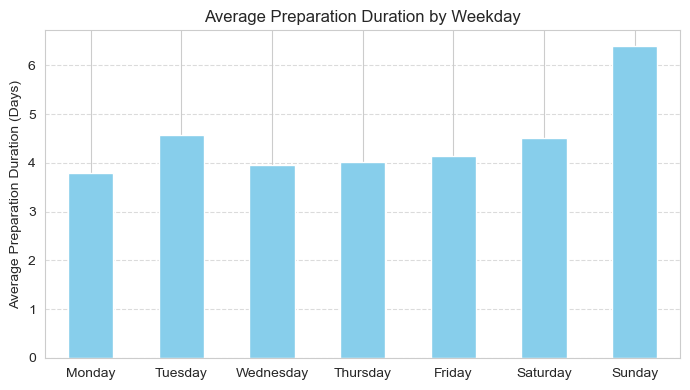

In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by weekday and calculate the average preparation duration for each weekday
average_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].mean()

# Create a bar plot
plt.figure(figsize=(7, 4))
average_prep_duration_by_weekday.loc[custom_order].plot(kind='bar', color='skyblue')
plt.title('Average Preparation Duration by Weekday')
plt.xlabel('')
plt.ylabel('Average Preparation Duration (Days)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [210]:
average_prep_duration_by_weekday.mean()


4.48813138377558

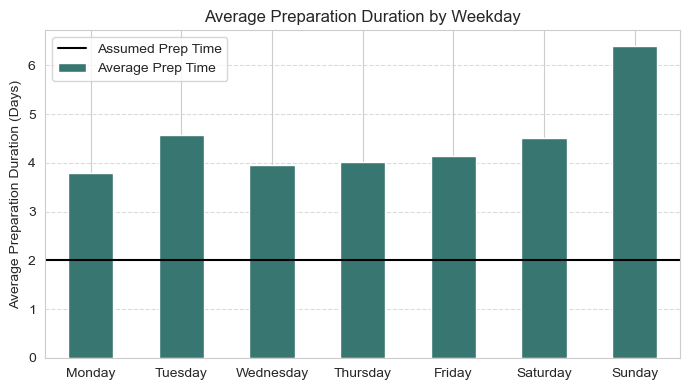

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group the data by weekday and calculate the average preparation duration for each weekday
average_prep_duration_by_weekday = df_prep_dur_ver.groupby('weekday')['prep_duration'].mean()

# Create a bar plot
plt.figure(figsize=(7, 4))
average_prep_duration_by_weekday.loc[custom_order].plot(kind='bar', color='#387771', label='Average Prep Time')
plt.axhline(y=2, color='black', linestyle='-', label='Assumed Prep Time')  
plt.title('Average Preparation Duration by Weekday')
plt.xlabel('')
plt.ylabel('Average Preparation Duration (Days)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


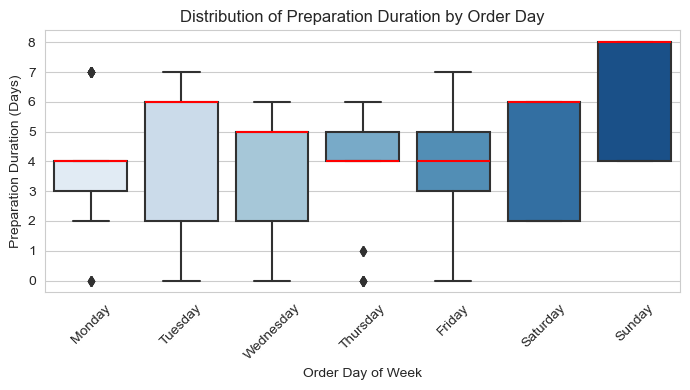

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
#KPI 1 order date - ready to ship date
# Convert the date columns to datetime format
df_prep_dur_ver['order_date'] = pd.to_datetime(df_prep_dur_ver['order_date'])
df_prep_dur_ver['ready_to_ship_date'] = pd.to_datetime(df_prep_dur_ver['ready_to_ship_date'])
df_prep_dur_ver['pickup_date'] = pd.to_datetime(df_prep_dur_ver['pickup_date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['prep_duration'] = (df_prep_dur_ver['ready_to_ship_date'] - df_prep_dur_ver['order_date']).dt.days

# Order the weekdays by their natural order
weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as boxplots with ordered weekdays and blue color
plt.figure(figsize=(7, 4))
sns.boxplot(x=df_prep_dur_ver['order_date'].dt.day_name(), y='prep_duration', data=df_prep_dur_ver, palette='Blues',
            order=weekdays_order, medianprops=dict(color='red'))
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('Order Day of Week')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


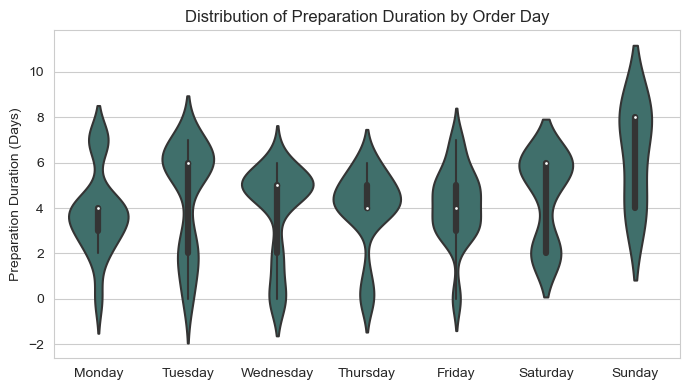

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the date columns to datetime format
df_prep_dur_ver['order_date'] = pd.to_datetime(df_prep_dur_ver['order_date'])
df_prep_dur_ver['ready_to_ship_date'] = pd.to_datetime(df_prep_dur_ver['ready_to_ship_date'])
df_prep_dur_ver['pickup_date'] = pd.to_datetime(df_prep_dur_ver['pickup_date'])

# Calculate the preparation duration for each order
df_prep_dur_ver['prep_duration'] = (df_prep_dur_ver['ready_to_ship_date'] - df_prep_dur_ver['order_date']).dt.days

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as a violin plot with custom weekday order
plt.figure(figsize=(7, 4))
sns.violinplot(x=df_prep_dur_ver['order_date'].dt.day_name(), y='prep_duration', data=df_prep_dur_ver, color='#387771', order=custom_order)
plt.title('Distribution of Preparation Duration by Order Day')
plt.xlabel('')
plt.ylabel('Preparation Duration (Days)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [114]:
import numpy as np

# Define the norm for preparation time
norm_prep_time = 2

# Create bins for categorizing preparation duration
bins = [-np.inf, norm_prep_time-1, norm_prep_time+1, np.inf]
labels = ['Early', 'On Time', 'Late']

# Create a new column 'status' to indicate the status of each order
df_prep_dur_ver['status'] = pd.cut(df_prep_dur_ver['prep_duration'], bins=bins, labels=labels)

# Count the number of orders in each status category
status_counts = df_prep_dur_ver['status'].value_counts()

# Print the counts
print("Number of orders by status:")
print(status_counts)



Number of orders by status:
status
Late       288
On Time     85
Early       45
Name: count, dtype: int64


In [115]:
status_counts_percent = (status_counts/418).round(2)
status_counts_percent

status
Late       0.69
On Time    0.20
Early      0.11
Name: count, dtype: float64

In [116]:
df_prep_dur_ver.describe()

,order_date,ready_to_ship_date,pickup_date,prep_duration
count,418,418,418,418.000000
mean,2020-07-12 15:47:22.105263360,2020-07-16 19:34:44.210526208,2020-07-18 11:01:26.124401920,4.157895
min,2019-09-02 00:00:00,2019-09-02 00:00:00,2019-09-03 00:00:00,0.000000
25%,2019-09-24 00:00:00,2019-09-25 06:00:00,2019-09-27 00:00:00,3.000000
50%,2020-11-09 00:00:00,2020-11-12 00:00:00,2020-11-13 00:00:00,5.000000
75%,2020-11-19 00:00:00,2020-11-23 00:00:00,2020-11-25 00:00:00,6.000000
max,2020-11-30 00:00:00,2020-12-07 00:00:00,2020-12-09 00:00:00,8.000000
std,NaN,NaN,NaN,1.949961


In [117]:
# KPI 2


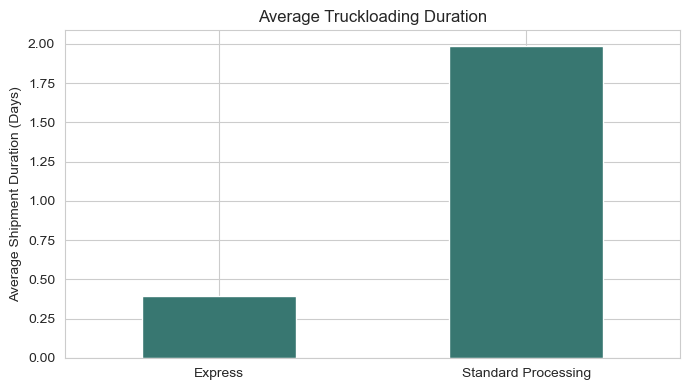

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_dur_readytoship_truck' is your DataFrame containing the data

# Convert date columns to datetime format
df_dur_readytoship_truck['ready_to_ship_date'] = pd.to_datetime(df_dur_readytoship_truck['ready_to_ship_date'])
df_dur_readytoship_truck['on_truck_scan_date'] = pd.to_datetime(df_dur_readytoship_truck['on_truck_scan_date'])

# Calculate the duration from ready to ship date to on-truck scan date
df_dur_readytoship_truck['shipment_duration'] = (df_dur_readytoship_truck['on_truck_scan_date'] - df_dur_readytoship_truck['ready_to_ship_date']).dt.days

# Group the data by ship mode and calculate the average duration for each mode
average_duration_by_ship_mode = df_dur_readytoship_truck.groupby('ship_mode')['shipment_duration'].mean()

# Plot the average duration by ship mode
plt.figure(figsize=(7, 4))
average_duration_by_ship_mode.plot(kind='bar', color='#387771')
plt.title('Average Truckloading Duration')
plt.xlabel('')
plt.ylabel('Average Shipment Duration (Days)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


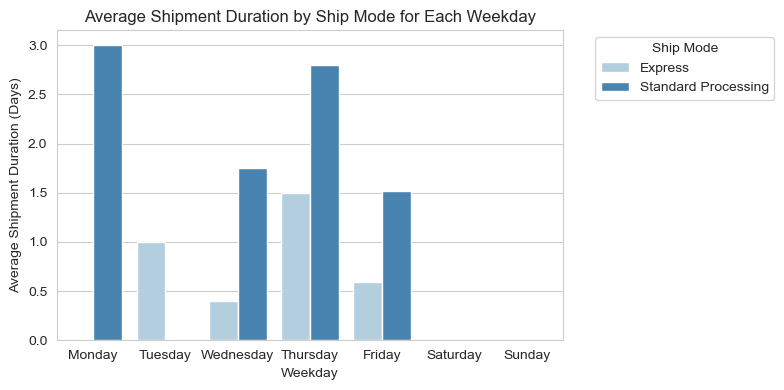

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert date columns to datetime format
df_dur_readytoship_truck['ready_to_ship_date'] = pd.to_datetime(df_dur_readytoship_truck['ready_to_ship_date'])
df_dur_readytoship_truck['on_truck_scan_date'] = pd.to_datetime(df_dur_readytoship_truck['on_truck_scan_date'])

# Calculate the duration from ready to ship date to on-truck scan date
df_dur_readytoship_truck['shipment_duration'] = (df_dur_readytoship_truck['on_truck_scan_date'] - df_dur_readytoship_truck['ready_to_ship_date']).dt.days

# Group the data by weekday and ship mode and calculate the average duration for each weekday and ship mode combination
average_duration_by_weekday_and_ship_mode = df_dur_readytoship_truck.groupby(['weekday', 'ship_mode'])['shipment_duration'].mean().reset_index()

# Plot the average duration by ship mode for each weekday
plt.figure(figsize=(8, 4))
sns.barplot(x='weekday', y='shipment_duration', hue='ship_mode', data=average_duration_by_weekday_and_ship_mode, palette='Blues', order=custom_order)
plt.title('Average Shipment Duration by Ship Mode for Each Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Shipment Duration (Days)')
plt.legend(title='Ship Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [120]:
# Filter the DataFrame for Tuesdays and Thursdays
tuesday_thursday_orders = df_dur_readytoship_truck[(df_dur_readytoship_truck['weekday'] == 'Tuesday') | (df_dur_readytoship_truck['weekday'] == 'Thursday')]

# Print the filtered DataFrame
tuesday_thursday_orders.head(20)


,order_id,on_truck_scan_date,ship_mode,ready_to_ship_date,pickup_date,ship_to_truck,weekday,shipment_duration
0,CA-2019-116540,2019-09-03,Express,2019-09-02,2019-09-03,1 days,Tuesday,1
80,US-2020-155425,2020-11-12,Express,2020-11-11,2020-11-12,1 days,Thursday,1
81,CA-2020-162096,2020-11-12,Express,2020-11-10,2020-11-12,2 days,Thursday,2
82,CA-2020-114258,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday,2
83,CA-2020-102925,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday,2
84,CA-2020-167941,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3
85,CA-2020-125290,2020-11-12,Standard Processing,2020-11-10,2020-11-12,2 days,Thursday,2
86,CA-2020-122504,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3
87,CA-2020-142636,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3
88,CA-2020-121615,2020-11-12,Standard Processing,2020-11-09,2020-11-12,3 days,Thursday,3


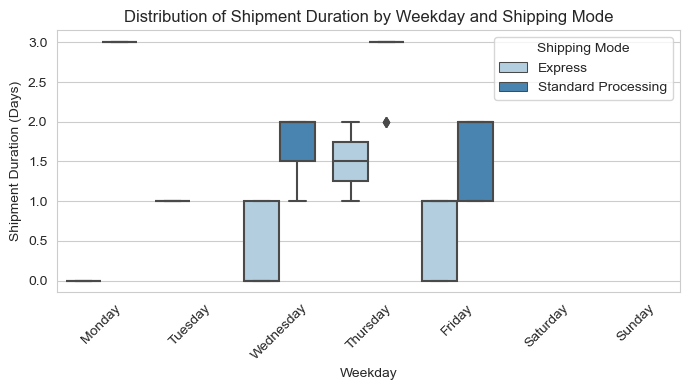

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom order of weekdays
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setting up Seaborn style
sns.set_style("whitegrid")

# Plotting the data as grouped boxplots for each weekday and shipping mode with custom order
plt.figure(figsize=(7, 4))
sns.boxplot(x='weekday', y='shipment_duration', hue='ship_mode', data=df_dur_readytoship_truck, palette='Blues', order=custom_order)
plt.title('Distribution of Shipment Duration by Weekday and Shipping Mode')
plt.xlabel('Weekday')
plt.ylabel('Shipment Duration (Days)')
plt.legend(title='Shipping Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [122]:
#KPI 3

In [123]:
df_order_del_time.head()


,order_id,on_truck_scan_date,ship_mode,arrival_scan_date,delivery_time
0,CA-2019-138933,2019-04-29,Express,2019-05-03,4 days
1,CA-2019-109666,2019-04-29,Standard Processing,2019-05-03,4 days
2,CA-2019-113061,2019-04-29,Standard Processing,2019-05-06,7 days
3,CA-2019-168081,2019-05-01,Standard Processing,2019-05-06,5 days
4,US-2019-150147,2019-05-01,Standard Processing,2019-05-07,6 days


In [124]:
import pandas as pd

# Assuming df_order_del_time is your DataFrame

# Grouping by 'ship_mode' and calculating the average delivery time
average_delivery_time = df_order_del_time.groupby('ship_mode')['delivery_time'].mean()

print(average_delivery_time)


ship_mode
Express                         4 days 11:31:12
Standard Processing   4 days 15:20:55.813953488
Name: delivery_time, dtype: timedelta64[ns]


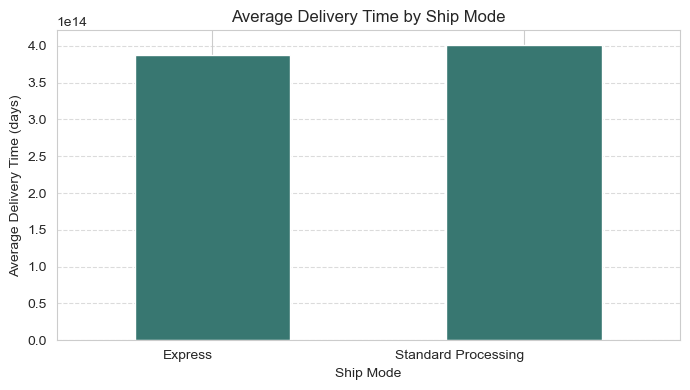

In [201]:
# Assuming df_order_del_time is your DataFrame

# Grouping by 'ship_mode' and calculating the average delivery time
average_delivery_time = df_order_del_time.groupby('ship_mode')['delivery_time'].mean()

# Plotting
plt.figure(figsize=(7, 4))
average_delivery_time.plot(kind='bar', color='#387771')
plt.title('Average Delivery Time by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Average Delivery Time (days)')
plt.xticks(rotation=0, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [126]:
df_order_del_time2.head()

,order_id,arrival_scan_date,ready_to_ship_date,pickup_date,delivery_time2
0,CA-2019-129630,2019-09-09,2019-09-04,2019-09-04,5 days
1,CA-2019-129847,2019-09-10,2019-09-04,2019-09-04,6 days
2,CA-2019-106278,2019-09-10,2019-09-05,2019-09-06,4 days
3,CA-2019-158099,2019-09-11,2019-09-05,2019-09-06,5 days
4,CA-2019-123120,2019-09-16,2019-09-09,2019-09-11,5 days


In [127]:
# Calculate the average delivery time
average_delivery_time2 = df_order_del_time2['delivery_time2'].mean()

print("Average Delivery Time from DataFrame 2:", average_delivery_time2)


Average Delivery Time from DataFrame 2: 4 days 16:21:49.090909090


In [128]:
#kpi 4

In [129]:
df_order_del_total.head()

,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time,order_weekday,order_time_hours,total_delivery_time_hours,order_time_days,total_delivery_time_days
0,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
1,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
2,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
3,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
4,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0


In [130]:
# Convert 'order_date' to datetime if it's not already
df_order_del_total['order_date'] = pd.to_datetime(df_order_del_total['order_date'])

# Add a new column for weekdays
df_order_del_total['order_weekday'] = df_order_del_total['order_date'].dt.day_name()

df_order_del_total.sample(3)



,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time,order_weekday,order_time_hours,total_delivery_time_hours,order_time_days,total_delivery_time_days
406,CA-2019-103128,2019-11-25,2019-11-11,SC-20845,Sung Chung,14 days,Monday,336.0,336.0,14.0,14.0
347,CA-2019-169887,2019-10-28,2019-10-22,MS-17530,MaryBeth Skach,6 days,Tuesday,144.0,144.0,6.0,6.0
126,CA-2019-169943,2019-06-03,2019-05-19,BN-11515,Bradley Nguyen,15 days,Sunday,360.0,360.0,15.0,15.0


In [131]:
# Group by weekday and calculate average delivery time
average_delivery_time_weekday = df_order_del_total.groupby('order_weekday')['total_delivery_time'].mean()

print(average_delivery_time_weekday)


order_weekday
Friday      10 days 14:57:52.941176470
Monday      11 days 17:31:41.123595505
Saturday     7 days 19:38:10.909090909
Sunday      11 days 01:06:27.692307692
Thursday     9 days 21:09:09.152542372
Tuesday     11 days 06:08:22.325581395
Wednesday   11 days 04:18:06.792452830
Name: total_delivery_time, dtype: timedelta64[ns]


In [132]:
import pandas as pd

# Assuming df_order_del_total is your DataFrame

# Convert 'order_date' and 'arrival_scan_date' to datetime if they're not already
df_order_del_total['order_date'] = pd.to_datetime(df_order_del_total['order_date'])
df_order_del_total['arrival_scan_date'] = pd.to_datetime(df_order_del_total['arrival_scan_date'])

# Calculate the order time in hours
df_order_del_total['order_time_hours'] = (df_order_del_total['arrival_scan_date'] - df_order_del_total['order_date']).dt.total_seconds() / 3600

df_order_del_total.head()


,order_id,arrival_scan_date,order_date,customer_id,customer_name,total_delivery_time,order_weekday,order_time_hours,total_delivery_time_hours,order_time_days,total_delivery_time_days
0,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
1,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
2,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
3,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0
4,CA-2019-109666,2019-05-03,2019-04-19,KM-16720,Kunst Miller,14 days,Friday,336.0,336.0,14.0,14.0


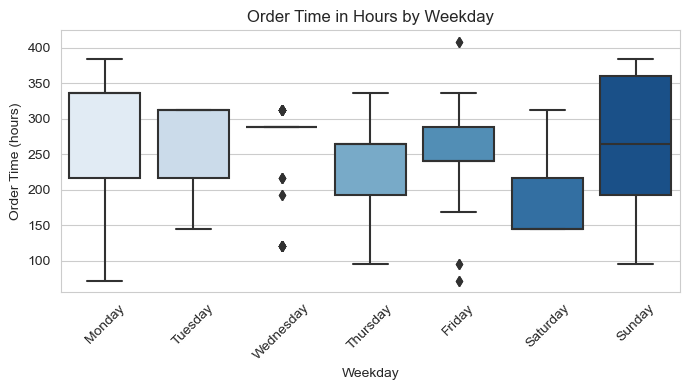

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_order_del_total is your DataFrame

# Plotting
plt.figure(figsize=(7, 4))
sns.boxplot(x='order_weekday', y='order_time_hours', data=df_order_del_total, palette='Blues', order=weekday_order)
plt.title('Order Time in Hours by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


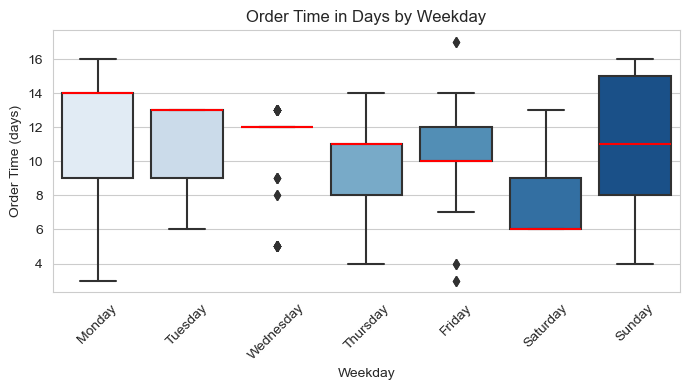

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting
plt.figure(figsize=(7, 4))
sns.boxplot(x='order_weekday', y='order_time_days', data=df_order_del_total, palette='Blues', order=weekday_order, medianprops={'color':'red'})
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


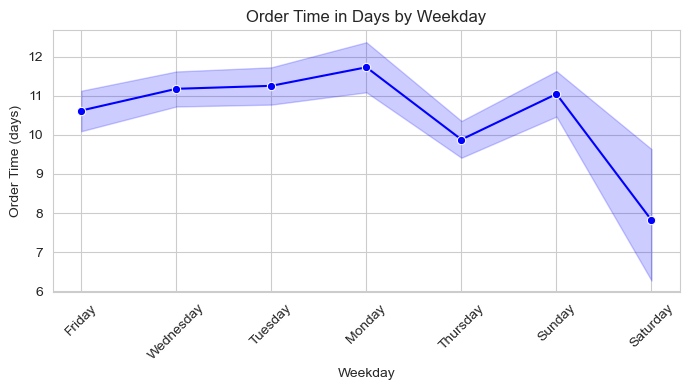

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting
plt.figure(figsize=(7, 4))
sns.lineplot(x='order_weekday', y='order_time_days', data=df_order_del_total, marker='o', color='blue')
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


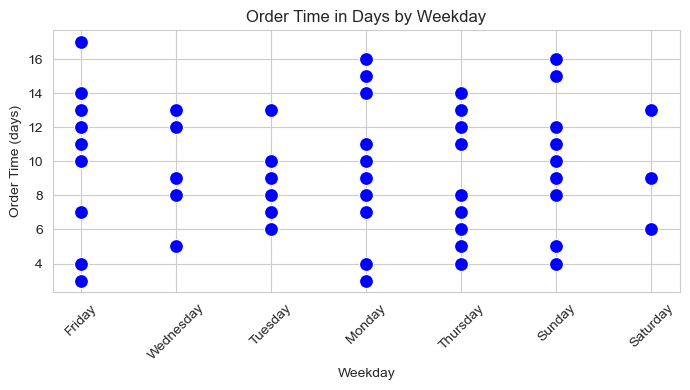

In [136]:
# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting scatter plot
plt.figure(figsize=(7, 4))
sns.scatterplot(x='order_weekday', y='order_time_days', data=df_order_del_total, color='blue', s=100)
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/nf_base/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


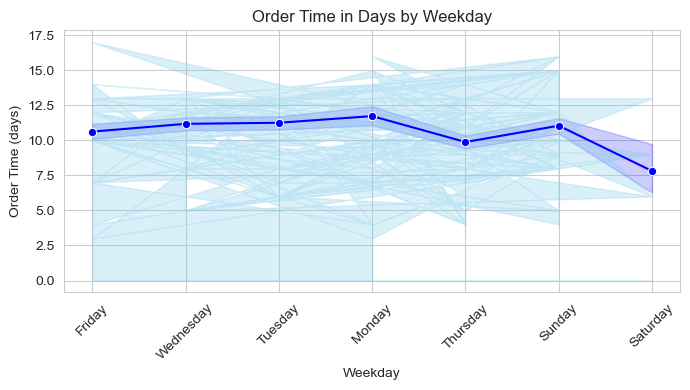

In [137]:
# Convert order time from hours to days
df_order_del_total['order_time_days'] = df_order_del_total['order_time_hours'] / 24

# Plotting area plot
plt.figure(figsize=(7, 4))
sns.lineplot(x='order_weekday', y='order_time_days', data=df_order_del_total, marker='o', color='blue')
plt.fill_between(df_order_del_total['order_weekday'], df_order_del_total['order_time_days'], color='skyblue', alpha=0.3)
plt.title('Order Time in Days by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Order Time (days)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


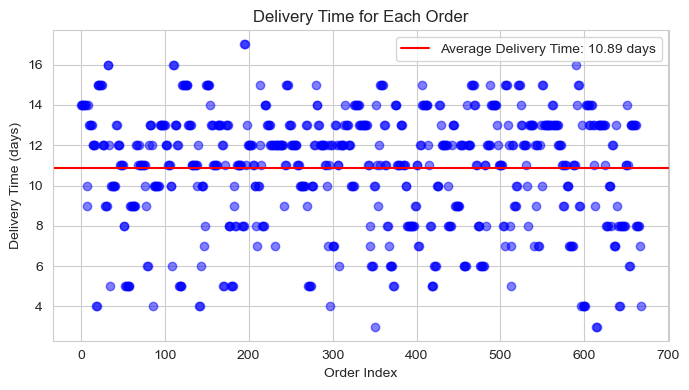

In [138]:
# Calculate average delivery time in days
average_delivery_time_days = df_order_del_total['total_delivery_time_days'].mean()

# Plotting scatter plot with average line
plt.figure(figsize=(7, 4))
plt.scatter(df_order_del_total.index, df_order_del_total['total_delivery_time_days'], color='blue', alpha=0.5)
plt.axhline(y=average_delivery_time_days, color='red', linestyle='-', label=f'Average Delivery Time: {average_delivery_time_days:.2f} days')
plt.title('Delivery Time for Each Order')
plt.xlabel('Order Index')
plt.ylabel('Delivery Time (days)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

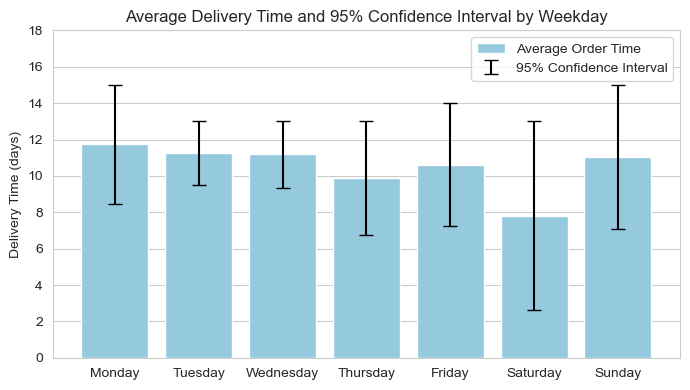

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_order_del_total is your DataFrame

# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average order time and 95th percentile for each weekday
average_order_time = df_order_del_total.groupby('order_weekday')['order_time_days'].mean().reindex(weekday_order)
percentile_95 = df_order_del_total.groupby('order_weekday')['order_time_days'].quantile(0.95).reindex(weekday_order)

# Plotting barplot
plt.figure(figsize=(7, 4))
sns.barplot(x=average_order_time.index, y=average_order_time.values, color='skyblue', label='Average Order Time')
plt.errorbar(x=average_order_time.index, y=average_order_time.values, yerr=np.abs(percentile_95 - average_order_time.values), fmt='none', ecolor='black', capsize=5, label='95% Confidence Interval')
plt.title('Average Delivery Time and 95% Confidence Interval by Weekday')
plt.xlabel('')
plt.ylabel('Delivery Time (days)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.ylim(0, 18)
plt.show()


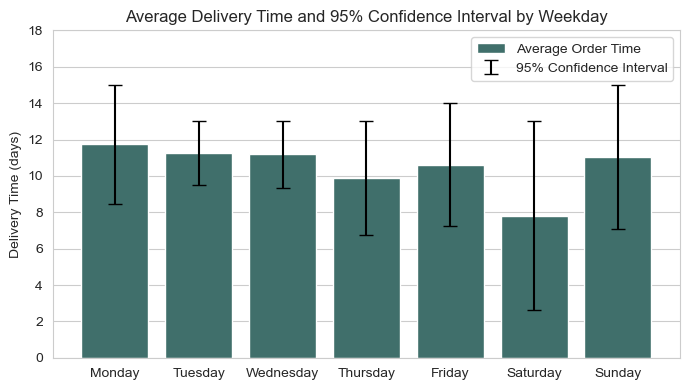

In [205]:
# Define the order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average order time and 95th percentile for each weekday
average_order_time = df_order_del_total.groupby('order_weekday')['order_time_days'].mean().reindex(weekday_order)
percentile_95 = df_order_del_total.groupby('order_weekday')['order_time_days'].quantile(0.95).reindex(weekday_order)

# Plotting barplot
plt.figure(figsize=(7, 4))
sns.barplot(x=average_order_time.index, y=average_order_time.values, palette=['#387771'], label='Average Order Time')
plt.errorbar(x=average_order_time.index, y=average_order_time.values, yerr=np.abs(percentile_95 - average_order_time.values), fmt='none', ecolor='black', capsize=5, label='95% Confidence Interval')
plt.title('Average Delivery Time and 95% Confidence Interval by Weekday')
plt.xlabel('')
plt.ylabel('Delivery Time (days)')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.ylim(0, 18)
plt.show()


In [162]:
df_total_del = df_order_del_total.merge(df2_no_dups, how='outer', on='order_id')

#average days for total delivery for each of the processing categories
df4 = df_total_del.groupby('ship_mode')[['total_delivery_time']].mean()

df4 

,total_delivery_time
ship_mode,
Express,7 days 04:42:09.729729729
Standard Processing,11 days 22:28:36.923076923


In [172]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, Express to Standard Processing
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   total_delivery_time  2 non-null      timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 32.0+ bytes


In [174]:
# Convert timedelta column to numeric format (float, representing seconds)
df4['total_delivery_time_seconds'] = df4['total_delivery_time'].dt.total_seconds()

# If you want to convert seconds to another unit (e.g., hours)
df4['total_delivery_time_hours'] = df4['total_delivery_time_seconds'] / 3600

# If you want to convert seconds to days
df4['total_delivery_time_days'] = df4['total_delivery_time_seconds'] / (3600 * 24)

df4

,total_delivery_time,total_delivery_time_seconds,total_delivery_time_hours,total_delivery_time_days
ship_mode,,,,
Express,7 days 04:42:09.729729729,6.217297e+05,172.702703,7.195946
Standard Processing,11 days 22:28:36.923076923,1.031317e+06,286.476923,11.936538


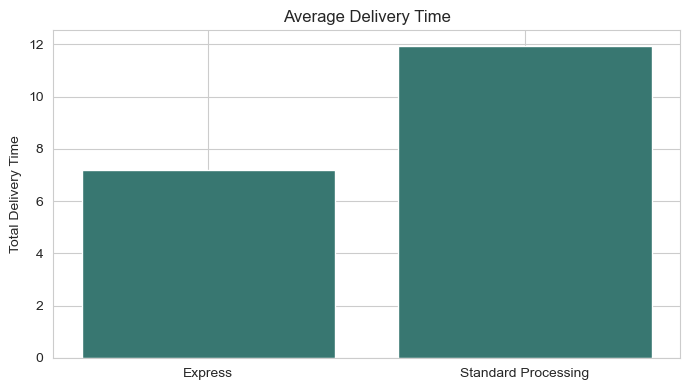

In [203]:
import matplotlib.pyplot as plt

# Assuming df4 is your DataFrame

# Plotting barplot
plt.figure(figsize=(7, 4))
plt.bar(df4.index, df4['total_delivery_time_days'], color='#387771')
plt.title('Average Delivery Time')
plt.xlabel('')
plt.ylabel('Total Delivery Time')
plt.tight_layout()
plt.show()
